# Trabalho de AM2

- https://www.kaggle.com/datasets/datamunge/sign-language-mnist



## Instalando Bibliotecas

In [1]:
# Sem biblioteca para instalar

## Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import os
import io
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

## Importando o arquivo

In [3]:
from google.colab import files
importado_test = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [4]:
from google.colab import files
importado_treino = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [5]:
# Carrega o .csv, aqui tem que colocar o nome

arquivo_test = 'sign_mnist_test.csv'
arquivo_train = 'sign_mnist_train.csv'
test_df = pd.read_csv(io.BytesIO(importado_test[arquivo_test]))
train_df = pd.read_csv(io.BytesIO(importado_treino[arquivo_train]))

## Informações do .csv

In [6]:
# Teste CSV

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [9]:
# Train CSV

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [11]:
# Describe

train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [12]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


## Pre-Processamento


In [13]:
# Conversao para o USO de CN em 3D

X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [14]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [15]:
# Uso do LabelBinarizer para MultiClass

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)


In [16]:
# y_train

y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [17]:
# Mudar a Dimensão

X_test=X_test.values.reshape(-1,28,28,1)

In [18]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


### Gerar Dados Aleatórios

Ferramenta que utiliza de geração de certas constantes que servem para rotacionar, aumentar o zoom, diminuir, ou escalar imagens, pixel a pixel.

In [19]:
# Muito legal

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255 # Normalização para trabalhar nesse intervalo

## Visualização dos dados

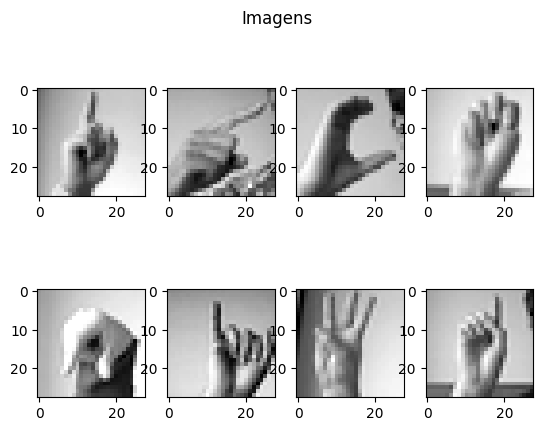

In [20]:
fig,axe=plt.subplots(2,4)
fig.suptitle('Imagens')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,2].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[0,3].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,0].imshow(X_train[5].reshape(28,28),cmap='gray')
axe[1,1].imshow(X_train[6].reshape(28,28),cmap='gray')
axe[1,2].imshow(X_train[7].reshape(28,28),cmap='gray')
axe[1,3].imshow(X_train[8].reshape(28,28),cmap='gray')

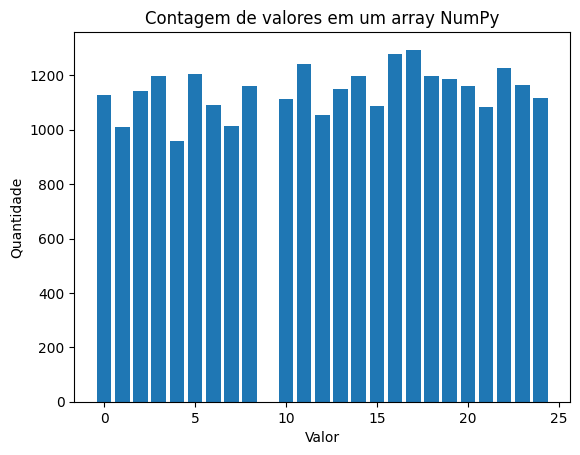

In [21]:
# Conta a frequência de cada valor no array
valores, contagens = np.unique(train_label, return_counts=True)

# Plotagem do gráfico de barras
plt.bar(valores, contagens)
plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.title('Contagem de valores em um array NumPy')
plt.show()

## Construindo o Modelo CNN



In [22]:
# 2 Camadas - Relu

model2C = Sequential()
model2C.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model2C.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model2C.add(Conv2D(64,kernel_size=(3,3),
                strides=1,activation='relu',padding='same'))
model2C.add(MaxPool2D((2,2),2,padding='same'))
model2C.add(Flatten())
model2C.add(Dense(units=512,activation='relu'))
model2C.add(Dropout(rate=0.25))
model2C.add(Dense(units=24,activation='softmax'))
model2C.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1

In [23]:
model2C.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

start_time = time.time()

model2C.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time_model2C = end_time - start_time

Epoch 1/40
138/138 [==============================] - 32s 166ms/step - loss: 2.8988 - accuracy: 0.1328 - val_loss: 2.0415 - val_accuracy: 0.3567
Epoch 2/40
138/138 [==============================] - 11s 78ms/step - loss: 1.9733 - accuracy: 0.3787 - val_loss: 1.3512 - val_accuracy: 0.5371
Epoch 3/40
138/138 [==============================] - 17s 124ms/step - loss: 1.4263 - accuracy: 0.5320 - val_loss: 0.8597 - val_accuracy: 0.7267
Epoch 4/40
138/138 [==============================] - 15s 105ms/step - loss: 1.1440 - accuracy: 0.6187 - val_loss: 0.7014 - val_accuracy: 0.7546
Epoch 5/40
138/138 [==============================] - 15s 106ms/step - loss: 0.9236 - accuracy: 0.6908 - val_loss: 0.5291 - val_accuracy: 0.8323
Epoch 6/40
138/138 [==============================] - 11s 77ms/step - loss: 0.8098 - accuracy: 0.7285 - val_loss: 0.4731 - val_accuracy: 0.8291
Epoch 7/40
138/138 [==============================] - 13s 95ms/step - loss: 0.6776 - accuracy: 0.7714 - val_loss: 0.3854 - val_accur

In [24]:
# 2 Camadas - LeakyReLU

model2CL = Sequential()
model2CL.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='LeakyReLU',input_shape=(28,28,1)))
model2CL.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model2CL.add(Conv2D(64,kernel_size=(3,3),
                strides=1,activation='LeakyReLU',padding='same'))
model2CL.add(MaxPool2D((2,2),2,padding='same'))
model2CL.add(Flatten())
model2CL.add(Dense(units=512,activation='LeakyReLU'))
model2CL.add(Dropout(rate=0.25))
model2CL.add(Dense(units=24,activation='softmax'))
model2CL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [25]:
model2CL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

start_time = time.time()

model2CL.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time_model2CL = end_time - start_time

Epoch 1/40
138/138 [==============================] - 12s 76ms/step - loss: 2.5728 - accuracy: 0.2206 - val_loss: 1.3121 - val_accuracy: 0.5629
Epoch 2/40
138/138 [==============================] - 9s 66ms/step - loss: 1.5115 - accuracy: 0.5103 - val_loss: 0.9572 - val_accuracy: 0.6440
Epoch 3/40
138/138 [==============================] - 9s 68ms/step - loss: 1.0976 - accuracy: 0.6409 - val_loss: 0.5393 - val_accuracy: 0.8416
Epoch 4/40
138/138 [==============================] - 11s 78ms/step - loss: 0.8624 - accuracy: 0.7173 - val_loss: 0.3902 - val_accuracy: 0.8723
Epoch 5/40
138/138 [==============================] - 10s 74ms/step - loss: 0.6916 - accuracy: 0.7696 - val_loss: 0.3318 - val_accuracy: 0.8900
Epoch 6/40
138/138 [==============================] - 10s 73ms/step - loss: 0.5671 - accuracy: 0.8149 - val_loss: 0.1898 - val_accuracy: 0.9578
Epoch 7/40
138/138 [==============================] - 10s 69ms/step - loss: 0.4853 - accuracy: 0.8396 - val_loss: 0.1717 - val_accuracy: 0

In [26]:
# 3 Camadas - Relu

model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 32)         

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

start_time = time.time()

model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time_model = end_time - start_time

Epoch 1/35
138/138 [==============================] - 13s 74ms/step - loss: 3.0005 - accuracy: 0.1012 - val_loss: 2.2248 - val_accuracy: 0.2892
Epoch 2/35
138/138 [==============================] - 9s 66ms/step - loss: 2.2056 - accuracy: 0.3080 - val_loss: 1.4696 - val_accuracy: 0.5050
Epoch 3/35
138/138 [==============================] - 10s 74ms/step - loss: 1.6280 - accuracy: 0.4703 - val_loss: 0.9437 - val_accuracy: 0.6676
Epoch 4/35
138/138 [==============================] - 10s 73ms/step - loss: 1.2629 - accuracy: 0.5782 - val_loss: 0.8275 - val_accuracy: 0.6990
Epoch 5/35
138/138 [==============================] - 10s 75ms/step - loss: 1.0555 - accuracy: 0.6469 - val_loss: 0.6086 - val_accuracy: 0.7854
Epoch 6/35
138/138 [==============================] - 10s 71ms/step - loss: 0.8827 - accuracy: 0.7000 - val_loss: 0.4857 - val_accuracy: 0.8187
Epoch 7/35
138/138 [==============================] - 10s 69ms/step - loss: 0.7507 - accuracy: 0.7459 - val_loss: 0.4775 - val_accuracy: 

In [28]:
# 3 Camadas - LERelu

model3Cl=Sequential()
model3Cl.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='LeakyReLU',input_shape=(28,28,1)))
model3Cl.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model3Cl.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='LeakyReLU',padding='same'))
model3Cl.add(MaxPool2D((2,2),2,padding='same'))
model3Cl.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='LeakyReLU',padding='same'))
model3Cl.add(MaxPool2D((2,2),2,padding='same'))

model3Cl.add(Flatten())
model3Cl.add(Dense(units=512,activation='LeakyReLU'))
model3Cl.add(Dropout(rate=0.25))
model3Cl.add(Dense(units=24,activation='softmax'))
model3Cl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 32)         

In [29]:
model3Cl.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

start_time = time.time()

model3Cl.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time_model3Cl = end_time - start_time

Epoch 1/35
138/138 [==============================] - 13s 81ms/step - loss: 2.8723 - accuracy: 0.1320 - val_loss: 1.9269 - val_accuracy: 0.3846
Epoch 2/35
138/138 [==============================] - 11s 82ms/step - loss: 1.9731 - accuracy: 0.3765 - val_loss: 1.1425 - val_accuracy: 0.6213
Epoch 3/35
138/138 [==============================] - 11s 76ms/step - loss: 1.4710 - accuracy: 0.5203 - val_loss: 0.8197 - val_accuracy: 0.7298
Epoch 4/35
138/138 [==============================] - 10s 74ms/step - loss: 1.2187 - accuracy: 0.5949 - val_loss: 0.7564 - val_accuracy: 0.7331
Epoch 5/35
138/138 [==============================] - 11s 77ms/step - loss: 1.0067 - accuracy: 0.6636 - val_loss: 0.7005 - val_accuracy: 0.7612
Epoch 6/35
138/138 [==============================] - 11s 80ms/step - loss: 0.8410 - accuracy: 0.7160 - val_loss: 0.5241 - val_accuracy: 0.8027
Epoch 7/35
138/138 [==============================] - 11s 80ms/step - loss: 0.7380 - accuracy: 0.7521 - val_loss: 0.3955 - val_accuracy:

## Avaliar

In [30]:
# Camada 2 - ReLu - model2C

(ls,acc)=model2C.evaluate(x=X_test,y=y_test)
print("Camada 2 - Relu")
print('Acurácia  = {}%'.format(acc*100))
print('Loss  = {}%'.format(ls))
print(f"Tempo total de execução: {elapsed_time_model2C} segundos")

# Camada 2 - LEReLu -

(ls,acc)=model2CL.evaluate(x=X_test,y=y_test)
print("Camada 2 - LERelu")
print('Acurácia  = {}%'.format(acc*100))
print('Loss  = {}%'.format(ls))
print(f"Tempo total de execução: {elapsed_time_model2CL} segundos")

# Camda 3 - Relu

(ls,acc)=model.evaluate(x=X_test,y=y_test)
print("Camada 3 - Relu")
print('Acurácia  = {}%'.format(acc*100))
print('Loss  = {}%'.format(ls))
print(f"Tempo total de execução: {elapsed_time_model} segundos")

# Camada 3 - LERelu

(ls,acc)=model3Cl.evaluate(x=X_test,y=y_test)
print("Camada 3 - LERelu")
print('Acurácia  = {}%'.format(acc*100))
print('Loss  = {}%'.format(ls))
print(f"Tempo total de execução: {elapsed_time_model3Cl} segundos")



225/225 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9950
Camada 2 - Relu
Acurácia  = 99.49804544448853%
Loss  = 0.016122296452522278%
Tempo total de execução: 526.3926019668579 segundos
225/225 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.9904
Camada 2 - LERelu
Acurácia  = 99.0379273891449%
Loss  = 0.03145444393157959%
Tempo total de execução: 450.7032775878906 segundos
225/225 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9971
Camada 3 - Relu
Acurácia  = 99.7071921825409%
Loss  = 0.01722065918147564%
Tempo total de execução: 421.1405248641968 segundos
225/225 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9916
Camada 3 - LERelu
Acurácia  = 99.16341304779053%
Loss  = 0.030814670026302338%
Tempo total de execução: 484.14260482788086 segundos


In [52]:
def plot_image(i, predicctions_array, true_label,img):
  predicctions_array, true_label, img = predicctions_array[i], true_label, img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)
  predicted_label = np.argmax(predicctions_array)

  color = 'blue'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,100*np.max(predicctions_array),true_label), color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(24), range(24))
  plt.yticks([])
  thisplot = plt.bar(range(24), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [68]:
predictions = model2C.predict(X_test)

225/225 [==============================] - 0s 2ms/step


In [66]:
predictions = model2CL.predict(X_test)

225/225 [==============================] - 1s 2ms/step


In [64]:
predictions = model.predict(X_test)

225/225 [==============================] - 0s 2ms/step


In [62]:
predictions = model3Cl.predict(X_test)

225/225 [==============================] - 1s 3ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

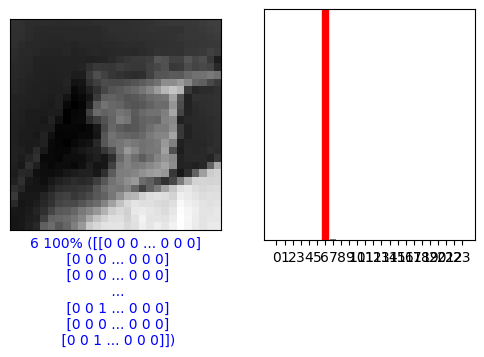

In [69]:
i = 1366
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, y_test ,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predictions, y_test)


print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Lixo

## Construindo o Modelo CNN



In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 6s 25ms/step - loss: 0.0197 - accuracy: 0.9946


In [ ]:
print('Acurácia  = {}%'.format(acc*100))

Acurácia  = 99.45622086524963%


In [ ]:
import time

start_time = time.time()

model2C.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo total de execução: {elapsed_time} segundos")

Epoch 1/40
138/138 [==============================] - 146s 1s/step - loss: 0.0979 - accuracy: 0.9689 - val_loss: 0.0209 - val_accuracy: 0.9941
Epoch 2/40
138/138 [==============================] - 144s 1s/step - loss: 0.0953 - accuracy: 0.9683 - val_loss: 0.0155 - val_accuracy: 0.9962
Epoch 3/40
138/138 [==============================] - 142s 1s/step - loss: 0.0859 - accuracy: 0.9709 - val_loss: 0.0170 - val_accuracy: 0.9918
Epoch 4/40
138/138 [==============================] - 141s 1s/step - loss: 0.0900 - accuracy: 0.9705 - val_loss: 0.0116 - val_accuracy: 0.9972
Epoch 5/40
138/138 [==============================] - 144s 1s/step - loss: 0.0897 - accuracy: 0.9702 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 6/40
138/138 [==============================] - 140s 1s/step - loss: 0.0883 - accuracy: 0.9705 - val_loss: 0.0073 - val_accuracy: 0.9992
Epoch 7/40
138/138 [==============================] - 141s 1s/step - loss: 0.0919 - accuracy: 0.9687 - val_loss: 0.0058 - val_accuracy: 0.9979

In [ ]:
import time

start_time = time.time()

model2CL.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo total de execução: {elapsed_time} segundos")

Epoch 1/40
138/138 [==============================] - 150s 1s/step - loss: 0.1042 - accuracy: 0.9673 - val_loss: 0.0200 - val_accuracy: 0.9940
Epoch 2/40
138/138 [==============================] - 153s 1s/step - loss: 0.0988 - accuracy: 0.9681 - val_loss: 0.0572 - val_accuracy: 0.9844
Epoch 3/40
138/138 [==============================] - 150s 1s/step - loss: 0.1067 - accuracy: 0.9651 - val_loss: 0.0842 - val_accuracy: 0.9792
Epoch 4/40
138/138 [==============================] - 149s 1s/step - loss: 0.1036 - accuracy: 0.9663 - val_loss: 0.0161 - val_accuracy: 0.9955
Epoch 5/40
138/138 [==============================] - 152s 1s/step - loss: 0.1046 - accuracy: 0.9665 - val_loss: 0.0267 - val_accuracy: 0.9939
Epoch 6/40
138/138 [==============================] - 153s 1s/step - loss: 0.0861 - accuracy: 0.9726 - val_loss: 0.0466 - val_accuracy: 0.9848
Epoch 7/40
138/138 [==============================] - 151s 1s/step - loss: 0.1036 - accuracy: 0.9674 - val_loss: 0.0182 - val_accuracy: 0.9932

In [ ]:
import time

start_time = time.time()

model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo total de execução: {elapsed_time} segundos")

Epoch 1/40
138/138 [==============================] - 106s 765ms/step - loss: 0.1283 - accuracy: 0.9569 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 2/40
138/138 [==============================] - 106s 770ms/step - loss: 0.1155 - accuracy: 0.9614 - val_loss: 0.0114 - val_accuracy: 0.9971
Epoch 3/40
138/138 [==============================] - 106s 768ms/step - loss: 0.1258 - accuracy: 0.9583 - val_loss: 0.0133 - val_accuracy: 0.9979
Epoch 4/40
138/138 [==============================] - 104s 757ms/step - loss: 0.1167 - accuracy: 0.9610 - val_loss: 0.0432 - val_accuracy: 0.9869
Epoch 5/40
138/138 [==============================] - 106s 771ms/step - loss: 0.1135 - accuracy: 0.9613 - val_loss: 0.0129 - val_accuracy: 0.9953
Epoch 6/40
138/138 [==============================] - 105s 761ms/step - loss: 0.1153 - accuracy: 0.9613 - val_loss: 0.0105 - val_accuracy: 0.9983
Epoch 7/40
138/138 [==============================] - 116s 844ms/step - loss: 0.1223 - accuracy: 0.9605 - val_loss: 0.0212 -

In [ ]:
import time

start_time = time.time()

model3Cl.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Tempo total de execução: {elapsed_time} segundos")

NameError: name 'model3Cl' is not defined

In [ ]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model4.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 142s 1s/step - loss: 3.0020 - accuracy: 0.0891 - val_loss: 2.6139 - val_accuracy: 0.2001
Epoch 2/35
138/138 [==============================] - 190s 1s/step - loss: 2.5593 - accuracy: 0.1956 - val_loss: 1.9964 - val_accuracy: 0.3684
Epoch 3/35
138/138 [==============================] - 168s 1s/step - loss: 2.1193 - accuracy: 0.3139 - val_loss: 1.5043 - val_accuracy: 0.5088
Epoch 4/35
138/138 [==============================] - 165s 1s/step - loss: 1.7658 - accuracy: 0.4093 - val_loss: 1.2098 - val_accuracy: 0.5852
Epoch 5/35
138/138 [==============================] - 143s 1s/step - loss: 1.5350 - accuracy: 0.4769 - val_loss: 1.0779 - val_accuracy: 0.6118
Epoch 6/35
138/138 [==============================] - 140s 1s/step - loss: 1.3611 - accuracy: 0.5322 - val_loss: 1.0437 - val_accuracy: 0.6460
Epoch 7/35
138/138 [==============================] - 139s 1s/step - loss: 1.2286 - accuracy: 0.5720 - val_loss: 0.9087 - val_accuracy: 0.6649

KeyboardInterrupt: 

## Construindo o Modelo CNN



In [ ]:
# 2 Camadas - Relu

model2C = Sequential()
model2C.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model2C.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model2C.add(Conv2D(64,kernel_size=(3,3),
                strides=1,activation='relu',padding='same'))
model2C.add(MaxPool2D((2,2),2,padding='same'))
model2C.add(Flatten())
model2C.add(Dense(units=512,activation='relu'))
model2C.add(Dropout(rate=0.25))
model2C.add(Dense(units=24,activation='softmax'))
model2C.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [ ]:
model2C.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2C.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/40
138/138 [==============================] - 164s 1s/step - loss: 2.9226 - accuracy: 0.1228 - val_loss: 1.9633 - val_accuracy: 0.3664
Epoch 2/40
138/138 [==============================] - 145s 1s/step - loss: 1.9368 - accuracy: 0.3818 - val_loss: 1.2999 - val_accuracy: 0.5807
Epoch 3/40
138/138 [==============================] - 146s 1s/step - loss: 1.4144 - accuracy: 0.5328 - val_loss: 0.8555 - val_accuracy: 0.7135
Epoch 4/40
138/138 [==============================] - 141s 1s/step - loss: 1.0892 - accuracy: 0.6371 - val_loss: 0.6452 - val_accuracy: 0.7853
Epoch 5/40
138/138 [==============================] - 142s 1s/step - loss: 0.8696 - accuracy: 0.7091 - val_loss: 0.4540 - val_accuracy: 0.8521
Epoch 6/40
138/138 [==============================] - 142s 1s/step - loss: 0.7463 - accuracy: 0.7518 - val_loss: 0.4426 - val_accuracy: 0.8447
Epoch 7/40
138/138 [==============================] - 142s 1s/step - loss: 0.6204 - accuracy: 0.7952 - val_loss: 0.3014 - val_accuracy: 0.9002

In [ ]:
# 2 Camadas - LeakyReLU

model2CL = Sequential()
model2CL.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='LeakyReLU',input_shape=(28,28,1)))
model2CL.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model2CL.add(Conv2D(64,kernel_size=(3,3),
                strides=1,activation='LeakyReLU',padding='same'))
model2CL.add(MaxPool2D((2,2),2,padding='same'))
model2CL.add(Flatten())
model2CL.add(Dense(units=512,activation='LeakyReLU'))
model2CL.add(Dropout(rate=0.25))
model2CL.add(Dense(units=24,activation='softmax'))
model2CL.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 512)              

In [ ]:
model2CL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2CL.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 40,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/40
138/138 [==============================] - 152s 1s/step - loss: 2.5486 - accuracy: 0.2280 - val_loss: 1.3913 - val_accuracy: 0.5414
Epoch 2/40
138/138 [==============================] - 156s 1s/step - loss: 1.4987 - accuracy: 0.5188 - val_loss: 0.7889 - val_accuracy: 0.7394
Epoch 3/40
138/138 [==============================] - 153s 1s/step - loss: 1.0995 - accuracy: 0.6398 - val_loss: 0.6380 - val_accuracy: 0.7793
Epoch 4/40
138/138 [==============================] - 151s 1s/step - loss: 0.8581 - accuracy: 0.7192 - val_loss: 0.3798 - val_accuracy: 0.8819
Epoch 5/40
138/138 [==============================] - 153s 1s/step - loss: 0.7081 - accuracy: 0.7659 - val_loss: 0.4040 - val_accuracy: 0.8791
Epoch 6/40
138/138 [==============================] - 154s 1s/step - loss: 0.5721 - accuracy: 0.8112 - val_loss: 0.2951 - val_accuracy: 0.8954
Epoch 7/40
138/138 [==============================] - 157s 1s/step - loss: 0.4831 - accuracy: 0.8396 - val_loss: 0.2191 - val_accuracy: 0.9229

In [ ]:
# 3 Camadas - Relu

model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 101s 720ms/step - loss: 3.0243 - accuracy: 0.0982 - val_loss: 2.3998 - val_accuracy: 0.2589
Epoch 2/35
138/138 [==============================] - 111s 801ms/step - loss: 2.2551 - accuracy: 0.2881 - val_loss: 1.4177 - val_accuracy: 0.5170
Epoch 3/35
138/138 [==============================] - 103s 744ms/step - loss: 1.6099 - accuracy: 0.4725 - val_loss: 1.0107 - val_accuracy: 0.6564
Epoch 4/35
138/138 [==============================] - 108s 780ms/step - loss: 1.2349 - accuracy: 0.5884 - val_loss: 0.8767 - val_accuracy: 0.7089
Epoch 5/35
138/138 [==============================] - 103s 748ms/step - loss: 1.0108 - accuracy: 0.6616 - val_loss: 0.6068 - val_accuracy: 0.7924
Epoch 6/35
138/138 [==============================] - 102s 739ms/step - loss: 0.8668 - accuracy: 0.7066 - val_loss: 0.5428 - val_accuracy: 0.8139
Epoch 7/35
138/138 [==============================] - 108s 780ms/step - loss: 0.7348 - accuracy: 0.7531 - val_loss: 0.4278 -

In [ ]:
# 3 Camadas - LERelu

model3Cl=Sequential()
model3Cl.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='LeakyReLU',input_shape=(28,28,1)))
model3Cl.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model3Cl.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='LeakyReLU',padding='same'))
model3Cl.add(MaxPool2D((2,2),2,padding='same'))
model3Cl.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='LeakyReLU',padding='same'))
model3Cl.add(MaxPool2D((2,2),2,padding='same'))

model3Cl.add(Flatten())
model3Cl.add(Dense(units=512,activation='LeakyReLU'))
model3Cl.add(Dropout(rate=0.25))
model3Cl.add(Dense(units=24,activation='softmax'))
model3Cl.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 4, 4, 32)         

In [ ]:
model3Cl.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model3Cl.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 116s 830ms/step - loss: 2.8645 - accuracy: 0.1380 - val_loss: 1.8261 - val_accuracy: 0.4311
Epoch 2/35
138/138 [==============================] - 112s 810ms/step - loss: 1.8862 - accuracy: 0.3990 - val_loss: 1.1881 - val_accuracy: 0.5915
Epoch 3/35
138/138 [==============================] - 114s 825ms/step - loss: 1.3984 - accuracy: 0.5399 - val_loss: 0.8997 - val_accuracy: 0.6974
Epoch 4/35
138/138 [==============================] - 113s 820ms/step - loss: 1.1376 - accuracy: 0.6193 - val_loss: 0.7269 - val_accuracy: 0.7532
Epoch 5/35
138/138 [==============================] - 114s 827ms/step - loss: 0.9521 - accuracy: 0.6845 - val_loss: 0.5893 - val_accuracy: 0.7907
Epoch 6/35
138/138 [==============================] - 117s 845ms/step - loss: 0.8180 - accuracy: 0.7250 - val_loss: 0.4830 - val_accuracy: 0.8292
Epoch 7/35
138/138 [==============================] - 117s 846ms/step - loss: 0.7075 - accuracy: 0.7638 - val_loss: 0.3334 -